In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.optimize as opt

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
plt.rcParams['figure.figsize'] = (15, 7)

import warnings
warnings.filterwarnings("ignore")

# Question 1
Let $\pi$ be the fraction of the \$1,000,000.00 invested in the risky asset and $r$ be the return from the riskless asset. Then, the wealth of the portfolio after a year is:
$$
W = \pi (1 + x) + (1 - \pi)(1 + r)
$$
where $x$ is the annual returns on the portfolio. Since $x \sim N \left( \mu, \sigma^2 \right)$, we know that $W \sim N \left( 1 + r + \pi (\mu - r), \pi^2 \sigma^2 \right)$. Therefore, we have:
- $\mathbb{E} \left( U(W) \right) = \mathbb{E} \left( W - \frac{\alpha}{2} W^2 \right) = 1 + r + \pi (\mu - r) - \frac{\alpha}{2} \left( \left( 1 + r + \pi (\mu - r) \right)^2 + \pi^2 \sigma^2 \right)$
- $x_{\text{CE}} = U^{-1} \left( 1 + r + \pi (\mu - r) - \frac{\alpha}{2} \left( \left( 1 + r + \pi (\mu - r) \right)^2 + \pi^2 \sigma^2 \right) \right)$
- $\pi_A = \mu - U^{-1} \left( 1 + r + \pi (\mu - r) - \frac{\alpha}{2} \left( \left( 1 + r + \pi (\mu - r) \right)^2 + \pi^2 \sigma^2 \right) \right)$

To find the optimal value for $z$, given $\alpha$, we need to maximize $x_{\text{CE}}$:
$$
\begin{aligned}
\frac{\partial x_{\text{CE}}}{\partial \pi} & = \frac{(1 - \alpha r)(\mu - r) - 2\pi\alpha \left( (\mu - r)^2 + \sigma^2 \right)}{1 - \alpha U^{-1} \left( 1 + r + \pi (\mu - r) - \frac{\alpha}{2} \left( \left( 1 + r + \pi (\mu - r) \right)^2 + \pi^2 \sigma^2 \right) \right)}
\\ \therefore \left. \frac{\partial x_{\text{CE}}}{\partial \pi} \right|_{\pi = \pi^*} & = 0 \Longleftrightarrow (1 - \alpha r)(\mu - r) - 2 \pi^* \alpha \left( (\mu - r)^2 + \sigma^2 \right) = 0
\\ \therefore \pi^* & = \frac{(1 - \alpha r) (\mu - r)}{2 \alpha \left( (\mu - r)^2 + \sigma^2 \right)} \Longrightarrow z^* = \$ 1,000,000.00 \cdot \frac{(1 - \alpha r) (\mu - r)}{2 \alpha \left( (\mu - r)^2 + \sigma^2 \right)}
\end{aligned}
$$
The first equality comes from the fact that:
$$
\left( f^{-1}(x) \right)' = \frac{1}{f ' \left( f^{-1} (x) \right)}
$$

In [7]:
mu = 0.14 # annual returns of 25%
sigma2 = 0.4 ** 2 # risk
rf = 0.06 # riskfree return of 7%

z_star = lambda mu, sigma2, rf, a : 1e6 * (1 - a * rf) * (mu - rf) / 2 * a * ((mu - rf) ** 2 + sigma2)

alpha = np.linspace(0.0, 15, 30) # generate 50 evenly-spread out points between 0 and 15
z = z_star(mu, sigma2, rf, alpha) # compute the corresponding values of the optimal z, z_star

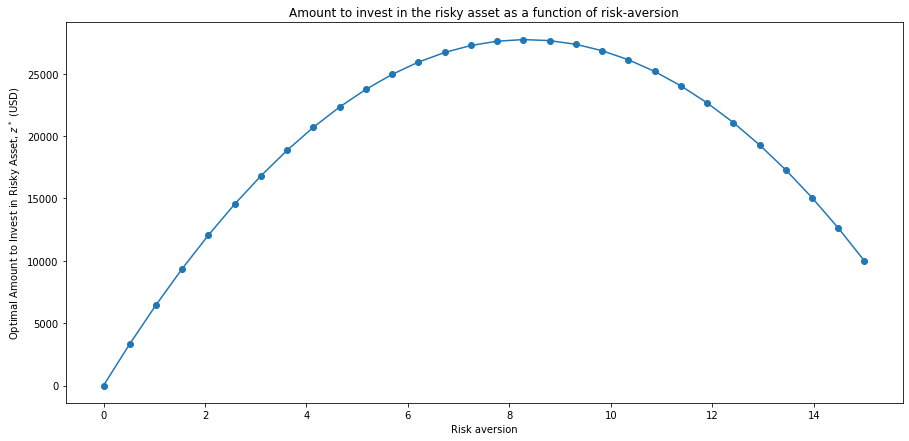

In [8]:
plt.plot(alpha, z)
plt.scatter(alpha, z)

plt.title("Amount to invest in the risky asset as a function of risk-aversion")
plt.xlabel("Risk aversion")
plt.ylabel("Optimal Amount to Invest in Risky Asset, $z^*$ (USD)")
plt.show()

# Question 3: Kelly's Criterion
After betting $f \cdot W_0$ amount in the game, we can get the returns of either $\alpha$ or $-\beta$. Therefore, the wealth you can have after the game is:
$$
W_1 = 
\begin{cases}
    W_0 \left(1 + f \cdot \alpha \right), & \text{with probability} ~ p \\
    W_0 \left(1 - f \cdot \beta \right), & \text{with probability} ~ 1 - p
\end{cases}
$$

Therefore, the utility obtained after playing the game becomes:
$$
\log \left( W_1 \right) = 
\begin{cases}
    \log \left( W_0 \right) + \log \left(1 + f \cdot \alpha \right), & \text{with probability} ~ p \\
    \log \left( W_0 \right) + \log \left(1 - f \cdot \beta \right), & \text{with probability} ~ 1 - p
\end{cases}
$$

Accordingly, the expected utility after the game becomes:
$$
\begin{aligned}
\mathbb{E} \left( \log W_1 \right) = \log W_0 + p \cdot \log \left(1 + f \cdot \alpha \right) + (1 - p) \cdot \log \left(1 - f \cdot \beta \right)
\end{aligned}
$$

To find the optimal fraction, $f^*$, we set the first derivative of the above function to 0 and solve for $f$:
$$
\begin{aligned}
\frac{\partial \mathbb{E} \left( \log W_1 \right)}{\partial f} & = \frac{p \cdot \alpha}{1 + \alpha \cdot f} - \frac{(1 - p) \cdot \beta}{1 - \beta \cdot f}
\\ \left. \frac{\partial \mathbb{E} \left( \log W_1 \right)}{\partial f} \right|_{f = f^*} & = 0 \Longrightarrow p\alpha \left(1 - \beta f^* \right) = \beta (1 - p) \left(1 + \alpha f^* \right)
\\ \therefore f^* & = \frac{p}{\beta} - \frac{1 - p}{\alpha}
\end{aligned}
$$

This makes sense intuitively, because if the probability of getting positive returns $(\alpha)$ is higher, you should invest more of your wealth and vice versa. On the other hand, if $\alpha$ becomes smaller, $f^*$ also becomes smaller, meaning that you shouldn't invest more since the risk isn't worth the returns. Similar reasoning for $\beta$ concludes this question.